<a href="https://colab.research.google.com/github/3TInfoTinker/DeepLearningHandsOn/blob/main/DLProj1Ecomerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project-1: Pakistan's Largest E-Commerce Dataset**

• Visualize payment method and order status frequency.🔴 [Later]\
• Find a correlation between payment method and order status.✅\
• Find a correlation between order date and item category.✅\
• Find any hidden patterns that are counterintuitive for a layman.✅\
• Can we predict the number of orders, or item category or number of customers/amount in advance?🔴[Later]


In [1]:
%cd drive/MyDrive/DLdataz/DLProject/
%ls

/content/drive/MyDrive/DLdataz/DLProject
 1-ProjectBasics.ipynb
 2-ProjectStats.ipynb
 3-ProjectPlots.ipynb
 BankChurners.gsheet
 BankChurners.xlsx
 DLProjectWork.odt
 Proj-1-ECommerce.docx
 Proj_1_PakistanLargestEcommerceDataset2.csv
 Proj_1_PakistanLargestEcommerceDataset.csv
 Proj-2-HealthCareMainDataset.csv
 Proj2test.csv
 Proj2train.csv
 Project2-StrokProject.docx
'Project3-DataSet-Real estate.csv'
'Projects Instructions.docx'


In [2]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import os
%matplotlib inline


In [3]:
df = pd.read_csv('Proj_1_PakistanLargestEcommerceDataset.csv', delimiter = ',', nrows = None)

norow, nocol = df.shape

print(f'\n\nOur dataset has {norow} Rows and {nocol} Columns.',"\n\n")




Our dataset has 584524 Rows and 21 Columns. 




/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
list(df)

['item_id',
 'status',
 'created_at',
 'sku',
 'price',
 'qty_ordered',
 'grand_total',
 'increment_id',
 'categories',
 'sales_commission_code',
 'discount_amount',
 'payment_method',
 'Working Date',
 'BI Status',
 ' MV ',
 'Year',
 'Month',
 'Customer Since',
 'M-Y',
 'FY',
 'Customer ID']

In [5]:
df.head()   # Head shows first 5 Records

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,categories,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131,complete,7/1/2016,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016,7,2016-7,7-2016,FY17,1.0
1,211133,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016,7,2016-7,7-2016,FY17,2.0
2,211134,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016,7,2016-7,7-2016,FY17,3.0
3,211135,complete,7/1/2016,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016,7,2016-7,7-2016,FY17,4.0
4,211136,order_refunded,7/1/2016,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016,7,2016-7,7-2016,FY17,5.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  int64  
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  int64  
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   categories             584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-nu

In [7]:
dfcols = len(df.columns)
dfrows = len(df)
print(f'No. of Columns = {dfcols}\n\n No. of Rows = {dfrows}')

No. of Columns = 21

 No. of Rows = 584524


**We have Columns of following data types in our dataset:**

*float64 =     4*\
*int64   =     4*\
*object  =    13*

In [8]:
df.isnull().sum()

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
categories                  164
sales_commission_code    137175
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                  11
dtype: int64

#**df1 of *Object* data type**.

In [9]:
df1=df.select_dtypes(object)
df1       # df1 is functioning like: df1.head()  - and  - df1.tail()

,status,created_at,sku,increment_id,categories,sales_commission_code,payment_method,Working Date,BI Status,MV,Customer Since,M-Y,FY
0,complete,7/1/2016,kreations_YI 06-L,100147443,Women's Fashion,\N,cod,7/1/2016,#REF!,"1,950",2016-7,7-2016,FY17
1,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,100147444,Beauty & Grooming,\N,cod,7/1/2016,Gross,240,2016-7,7-2016,FY17
2,canceled,7/1/2016,Ego_UP0017-999-MR0,100147445,Women's Fashion,\N,cod,7/1/2016,Gross,"2,450",2016-7,7-2016,FY17
3,complete,7/1/2016,kcc_krone deal,100147446,Beauty & Grooming,R-FSD-52352,cod,7/1/2016,Net,360,2016-7,7-2016,FY17
4,order_refunded,7/1/2016,BK7010400AG,100147447,Soghaat,\N,cod,7/1/2016,Valid,"1,110",2016-7,7-2016,FY17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,cod,8/28/2018,WOFSCE5AE00357AECDE,100562385,Women's Fashion,NaN,cod,8/28/2018,Valid,699,2018-8,8-2018,FY19
584520,processing,8/28/2018,MATHUA5AF70A7D1E50A,100562386,Mobiles & Tablets,NaN,bankalfalah,8/28/2018,Gross,"35,599",2018-8,8-2018,FY19
584521,processing,8/28/2018,MATSAM5B6D7208C6D30,100562387,Mobiles & Tablets,NaN,bankalfalah,8/28/2018,Gross,"259,998",2018-7,8-2018,FY19
584522,processing,8/28/2018,MATSAM5B1509B4696EA,100562387,Mobiles & Tablets,NaN,bankalfalah,8/28/2018,Gross,"174,600",2018-7,8-2018,FY19


In [10]:
list(df1)

['status',
 'created_at',
 'sku',
 'increment_id',
 'categories',
 'sales_commission_code',
 'payment_method',
 'Working Date',
 'BI Status',
 ' MV ',
 'Customer Since',
 'M-Y',
 'FY']

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584524 entries, 0 to 584523
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   status                 584509 non-null  object
 1   created_at             584524 non-null  object
 2   sku                    584504 non-null  object
 3   increment_id           584524 non-null  object
 4   categories             584360 non-null  object
 5   sales_commission_code  447349 non-null  object
 6   payment_method         584524 non-null  object
 7   Working Date           584524 non-null  object
 8   BI Status              584524 non-null  object
 9    MV                    584524 non-null  object
 10  Customer Since         584513 non-null  object
 11  M-Y                    584524 non-null  object
 12  FY                     584524 non-null  object
dtypes: object(13)
memory usage: 58.0+ MB


In [12]:
df1cols = len(df1.columns)
df1rows = len(df1)
print(f'No. of Columns = {df1cols}\n\n No. of Rows = {df1rows}')

No. of Columns = 13

 No. of Rows = 584524


In [13]:
df1.isnull().sum()


status                       15
created_at                    0
sku                          20
increment_id                  0
categories                  164
sales_commission_code    137175
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Customer Since               11
M-Y                           0
FY                            0
dtype: int64

**Above we found that Column of *sales_commission_code* has the most Null/Missing valuse/data.**

#**Find correlation between Payment method / Order status, and Order date / Item categories**

##🔧🔨*Transforming Object values to String to findout the 🔩 Correlation between different columns of data.*

In [14]:
objcts = df.select_dtypes(include = "object").columns
print (objcts)



Index(['status', 'created_at', 'sku', 'increment_id', 'categories',
       'sales_commission_code', 'payment_method', 'Working Date', 'BI Status',
       ' MV ', 'Customer Since', 'M-Y', 'FY'],
      dtype='object')


In [15]:
#Label Encoding for object to numeric conversion

le = LabelEncoder()

for featur in objcts:
    df[featur] = le.fit_transform(df[featur].astype(str))

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  int64  
 1   status                 584524 non-null  int64  
 2   created_at             584524 non-null  int64  
 3   sku                    584524 non-null  int64  
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  int64  
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  int64  
 8   categories             584524 non-null  int64  
 9   sales_commission_code  584524 non-null  int64  
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  int64  
 12  Working Date           584524 non-null  int64  
 13  BI Status              584524 non-null  int64  
 14   MV                    584524 non-nu

##*Correlation between Payment_method and order Status*

In [16]:
corSttsPmtmthd= df.loc[:,['status','payment_method']].corr().round(decimals = 3)
print(corSttsPmtmthd)

                status  payment_method
status           1.000           0.129
payment_method   0.129           1.000


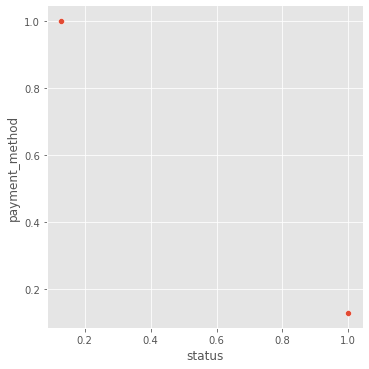

In [17]:
sns.relplot(x = "status", y = "payment_method", data = corSttsPmtmthd);

##*Correlation between order date and item Categories.*

In [18]:
corCrettdCtgrs = df.loc[:,['created_at','categories']].corr().round(decimals = 3)
print(corCrettdCtgrs)

            created_at  categories
created_at       1.000       0.055
categories       0.055       1.000


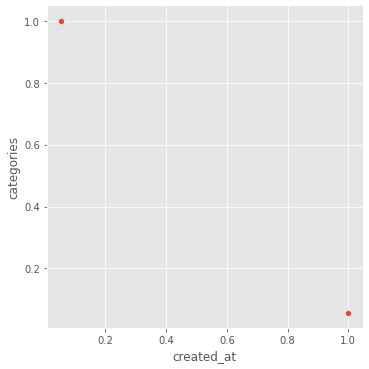

In [19]:

sns.relplot(x = "created_at", y = "categories", data = corCrettdCtgrs);

#**Visualize payment method and order status frequency.**

Pie charts represent relative frequencies by displaying how much of the whole pie each category represents.

Frequency tables and bar charts can display either the raw frequencies or relative frequencies.

##Frequency Table

In [20]:
frequenc = df.groupby(['payment_method', 'status'])['Year'].unique().reset_index()
frequenc

frequencsum = df.groupby(['payment_method', 'status'])['Year'].sum().reset_index()
frequencsum

,payment_method,status,Year
0,0,1,104982643
1,0,2,32272
2,0,4,38760065
3,0,7,4036
4,0,9,5289393
...,...,...,...
119,17,4,366912
120,17,6,2016
121,17,9,42336
122,17,15,12096


In [21]:
df.head(1)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,categories,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131,4,546,78201,1950.0,1,1950.0,2,14,6262,0.0,6,546,0,892,2016,7,3,18,0,1.0


In [22]:
Pmtunq = df1['payment_method'].unique()
Pmtunq
#Sttsunq = df1['status'].unique()
#Sttsunq
#Cretdunq = df1['created_at'].unique()
#Cretdunq
#print("Payment Method Unique Values:\n",Pmtunq,"\n\nOrder Status Unique Values:\n",Sttsunq,"\n\nOrder Created-on Unique Values:\n",Cretdunq)



array(['cod', 'ublcreditcard', 'mygateway', 'customercredit',
       'cashatdoorstep', 'mcblite', 'internetbanking', 'marketingexpense',
       'productcredit', 'financesettlement', 'Payaxis', 'jazzvoucher',
       'jazzwallet', 'Easypay', 'Easypay_MA', 'easypay_voucher',
       'bankalfalah', 'apg'], dtype=object)

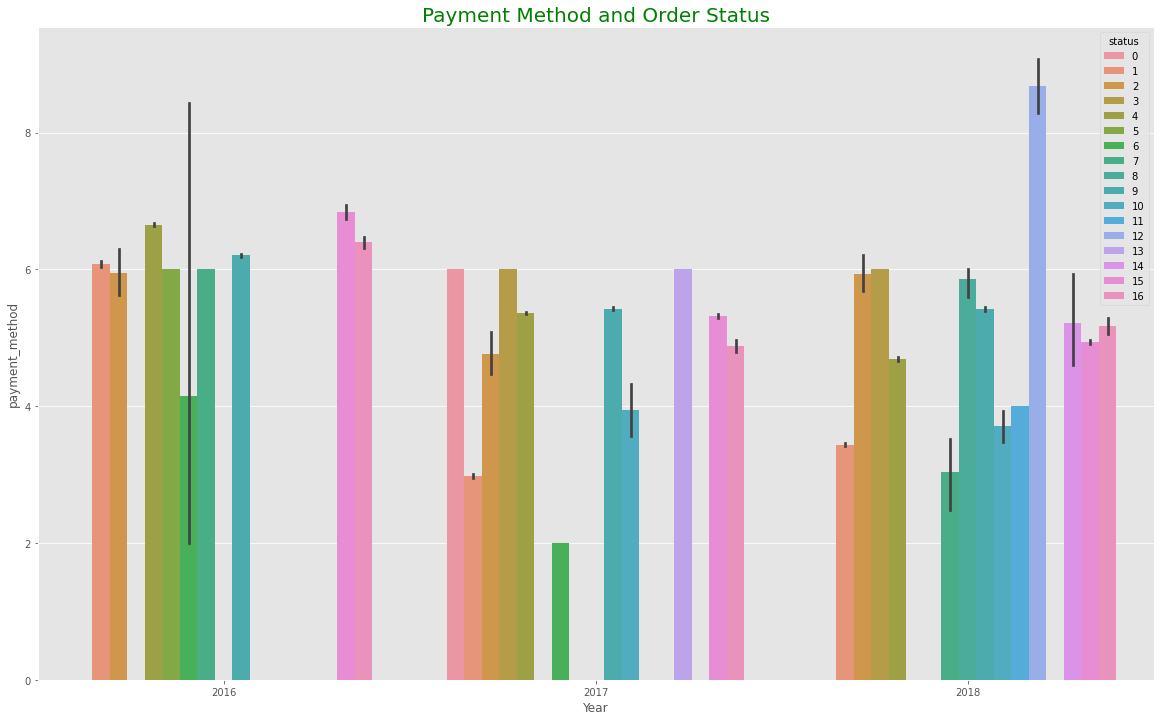

In [23]:

plt.figure(figsize = (20, 12))
plt.title("Payment Method and Order Status", fontsize = 20, color = 'Green', fontweight = 16)
ax = sns.barplot(data = df, x="Year", y="payment_method", hue="status")




In [24]:
# 1. Takes too long to draw.
#sns.catplot(data = df, kind = "swarm", x = "Year", y = "payment_method", hue = "status")

#**Find any hidden patterns that are counterintuitive for a layman.**

- A pattern is a series of repetative data that repeats in a recognizable way.\
- It can be identified in the history of the asset being evaluated or other assets with similar characteristics.\
- Patterns often include the study of sale volume, as well as price.
#*Also,*
A pattern means that our data/features of data are correlated that they have a relationship and are predictable. Without pattern, the data has true randomness. When a pattern is found, the data can provide a good idea about, when or where something will happen.

#**Visual Presentation of Dataset**

##*- Distribution of Columns*

In [25]:
def Coldistribution (df, Visualize, RecsVisual):
    
    nunique =df.nunique()

    # Looking for max 1000 Unique values in each colmn for data visualization.

    df = df[[column for column in df if nunique[column] >= 1 and nunique[column] <= 100]]

    rowcount, columcount = df.shape

    columheads = list(df)

    grphsho = (columcount + RecsVisual - 1) / RecsVisual


                                     # 6               8
    plt.figure(num = None, figsize = (18 * RecsVisual, 10 * grphsho), dpi = 80, facecolor = 'w', edgecolor = 'k')
    
       
    for rec in range(min(columcount, Visualize)):
        plt.subplot(grphsho, RecsVisual, rec + 1)

        dfcols = df.iloc[:, rec]

        if (not np.issubdtype(type(dfcols.iloc[0]), np.number)):

            valcount = dfcols.value_counts()
            valcount.plot.bar()

        else:
            dfcols.hist()
        plt.title(f'{columheads[rec]} (column{rec})', fontsize = 20, color = 'Green', fontweight = 16)
        plt.ylabel('COUNTS', fontsize = 16, color = 'Green')
        
        # Colors for X and Y Axes ticks.
        plt.tick_params(axis='x', colors='blue')
        plt.tick_params(axis='y', colors='blue')
        
        plt.xticks(rotation = 90, fontsize = 14, fontweight = 16)
    plt.tight_layout(pad = 0.5, w_pad = 0.5, h_pad = 0.5)
   
        


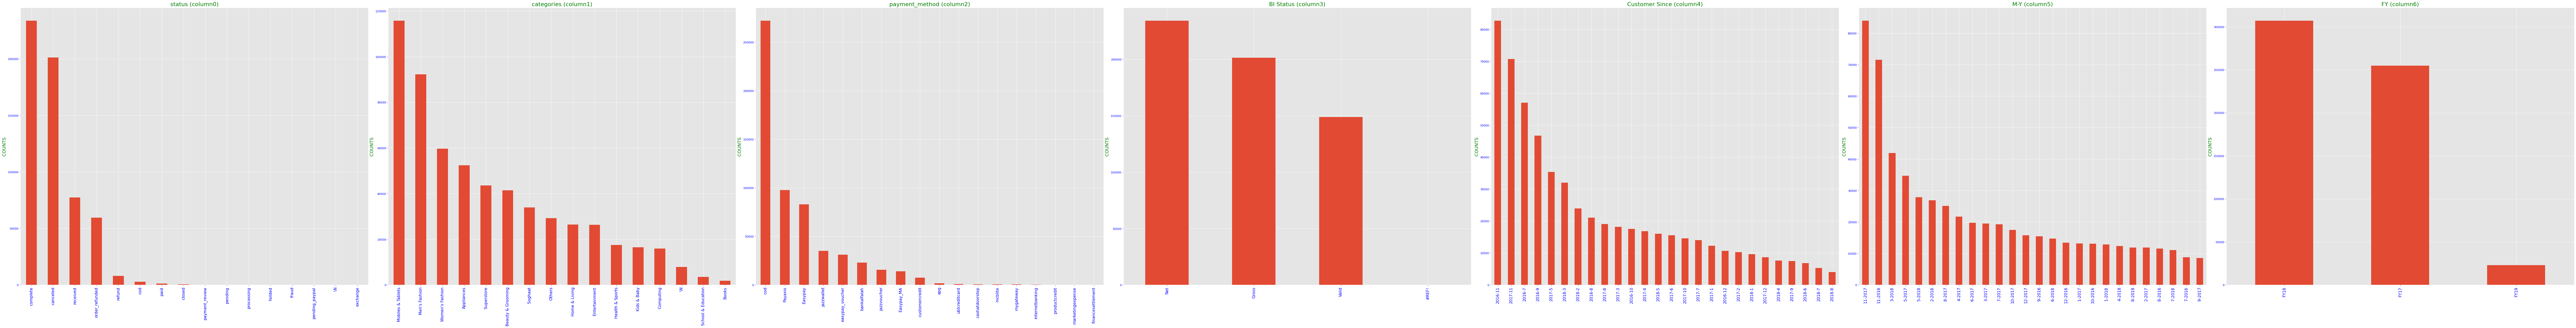

In [26]:
Coldistribution(df1, 18, 10)   # Later will make all these to show separately. 

##*- Correlation Matrix of Dataset*

In [27]:
corr = df.corr()
print("Total Correlated Columns: ",(len(corr)), "\n\n",(list(corr))) # Shows the Correlated column's titles


Total Correlated Columns:  21 

 ['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered', 'grand_total', 'increment_id', 'categories', 'sales_commission_code', 'discount_amount', 'payment_method', 'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since', 'M-Y', 'FY', 'Customer ID']


In [28]:
def Correlmatrix(df, Graph):

    df = df.dropna('columns')
    df = df[[column for column in df if df[column].nunique() > 1]]  # Column with 1 or more unique value wiil stay.
    
    if df.shape[1] < 2:
        print(f'No correlation plot for the columns with ({df.shape[1]}) Less than 2 non-NaN or Constants.')
        return
    
    corr = df.corr()
    plt.figure(num = None, figsize = (Graph + 4, Graph + 4), dpi = 80, facecolor = 'w', edgecolor = 'k')

    corrmtrx = plt.matshow(corr, fignum = 1)
    plt.title("Pakistan's Largest E-Comerce Dataset", fontsize = 20, color = 'Green', fontweight = 16)
    plt.xticks(range(len(corr.columns)), corr.columns, fontsize = 14, color = 'Blue', fontweight = 16, rotation = 90)
    plt.yticks(range(len(corr.columns)), corr.columns, fontsize = 14, color = 'Blue', fontweight = 16)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrmtrx)
    


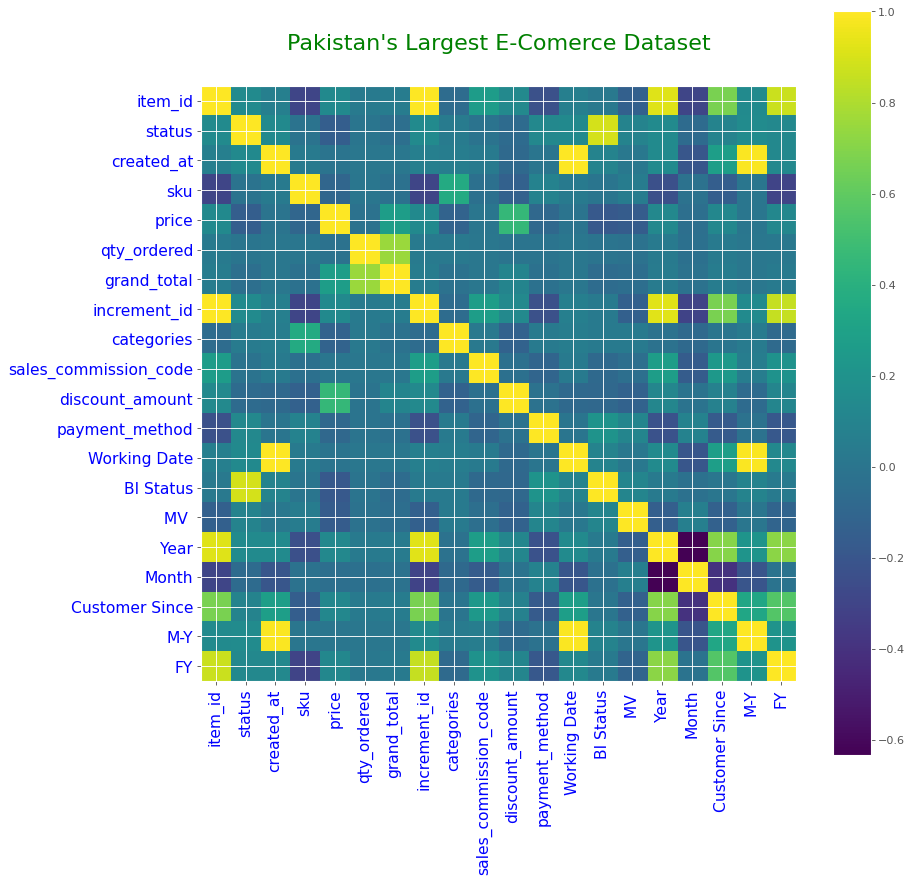

In [29]:
Correlmatrix(df, 8)   # To show the Matrix

#**⭕ Data Visualization with:**

##*- Density plot.*
##*- Scatter plot.*
[*Please do share, your valueable tips and guidance.*]

In [30]:
def scatrmtrx(df, plotarea, textweight):
    df = df.select_dtypes(include = [np.number])   # To keep the columns with numeric data only.

    #Removing all the rows and columns that would create "singular" df problem.

    df = df.dropna('columns')

    df = df[[column for column in df if df[column].nunique() > 1]]   # Column with 1 or more unique value wiil stay.

    columheads = list(df)

    # Reduces the Number of Columns, for matrix inversion of kernel density plot❓
    if len(columheads) > 10:
        columheads = columheads[:10]

    df = df[columheads]
    ax = pd.plotting.scatter_matrix(df, alpha = 0.75, figsize = [plotarea, plotarea], diagonal = 'kde')

    correl = df.corr().values

    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Correlation coef = %.3f' % correl[i, j], (0.8, 0.2), xycoords = 'axes fraction', ha = 'center', size = textweight)
        
    plt.suptitle('Scatter & Density Plots')
    plt.show()

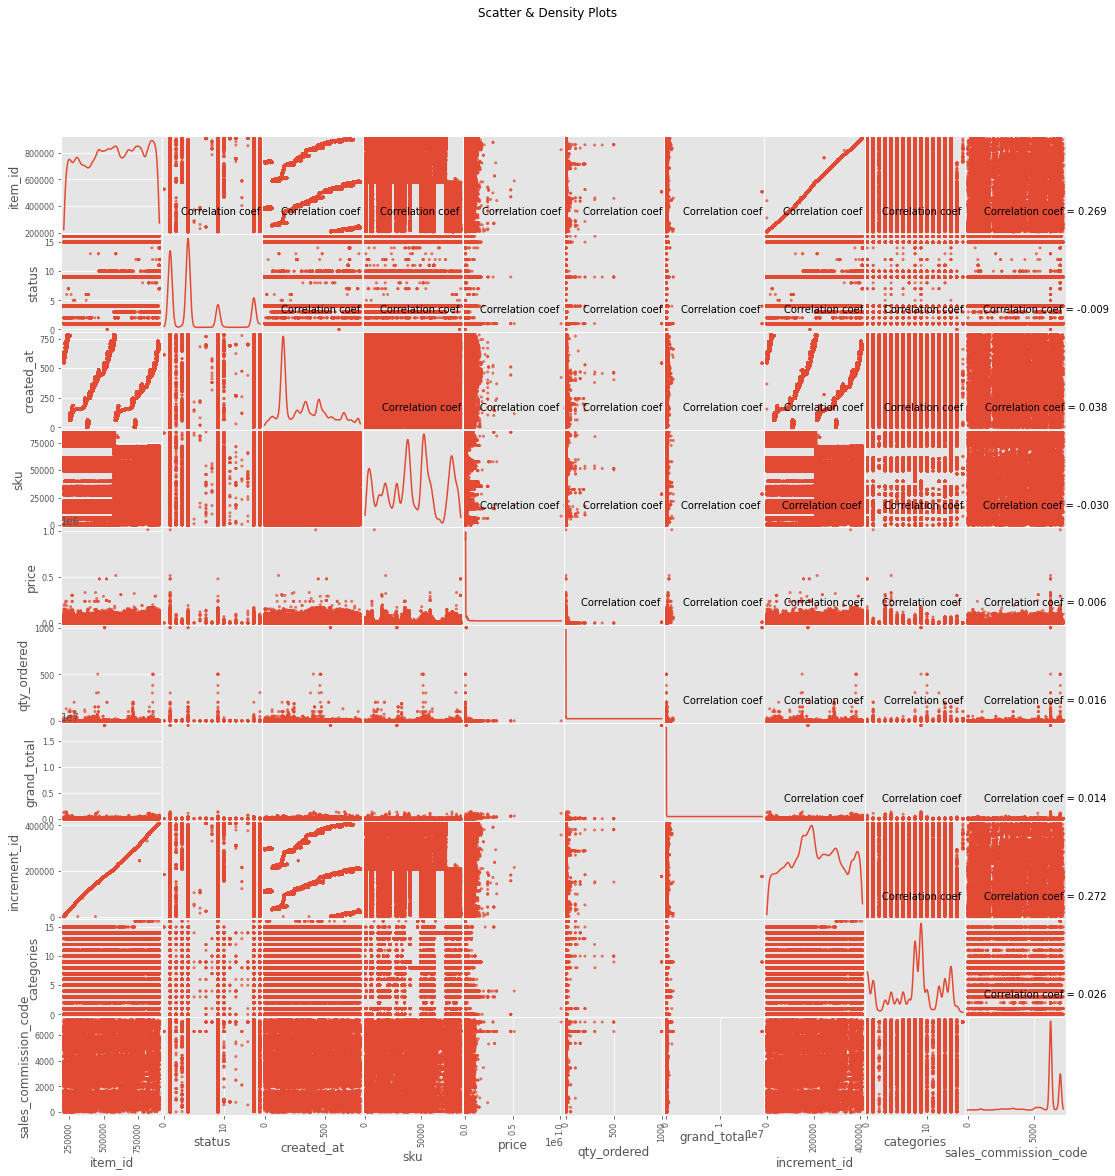

In [31]:
scatrmtrx(df, 18, 10)

##**Yearly Density plot for Payment Method**

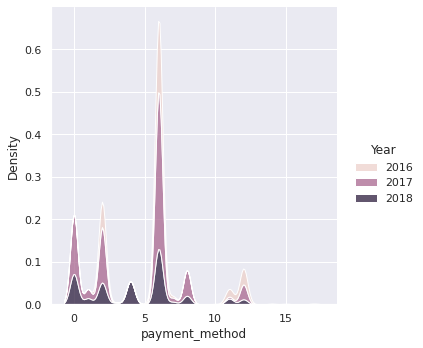

In [32]:
sns.set_theme(style = 'darkgrid')

sns.displot(df, x= "payment_method", hue = "Year", kind="kde", multiple = "stack");


 

##**Yearly Density Plot for Orders Status**

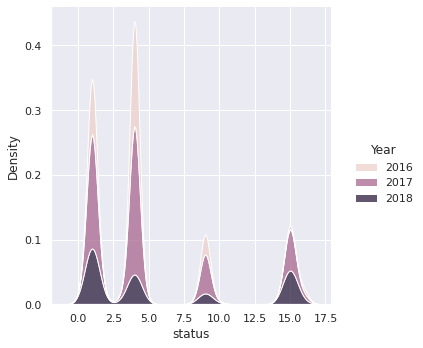

In [33]:
sns.displot(df, x= "status", hue = "Year", kind="kde", multiple = "stack");